In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
path = 'dest_arrange2/data_log(-872586238).json'

In [3]:
records = pd.read_json(path)

In [4]:
records.head(10)

,time_start,source_ip,dest_ip,protocol_n,STRTITLE,source_mac,dest_mac,pkt_size
0,1566277194,-757408877,-872586238,6,tcp null scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
1,1566277194,-757408882,-872586238,6,tcp null scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
2,1566277194,-757408878,-872586238,6,full xmas scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
3,1566277194,-757408884,-872586238,6,tcp null scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
4,1566277194,-757408874,-872586238,6,full xmas scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
5,1566277194,-757408883,-872586238,6,tcp null scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
6,1566277194,-757408878,-872586238,6,full xmas scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
7,1566277194,-757408874,-872586238,6,xmas scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
8,1566277194,-757408879,-872586238,6,full xmas scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
9,1566277194,-757408877,-872586238,6,xmas scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148


<h1>패킷, 소스 ip 비교</h1>

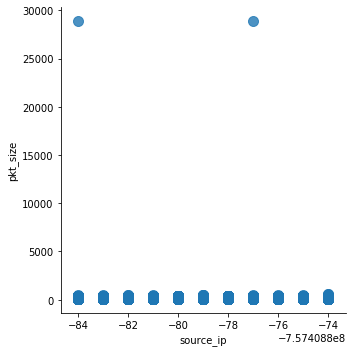

In [5]:
sns.lmplot('source_ip', 'pkt_size', data = records, fit_reg = False, scatter_kws={"s":100})

In [6]:
records[records['pkt_size'] >= 1000]

,time_start,source_ip,dest_ip,protocol_n,STRTITLE,source_mac,dest_mac,pkt_size
126704,1566280125,-757408884,-872586238,6,tcp syn flooding,00.15.C6.AE.50.C0,00.1B.17.00.01.10,28928
168287,1566280153,-757408877,-872586238,6,tcp syn flooding,00.15.C6.AE.50.C0,00.1B.17.00.01.10,28840


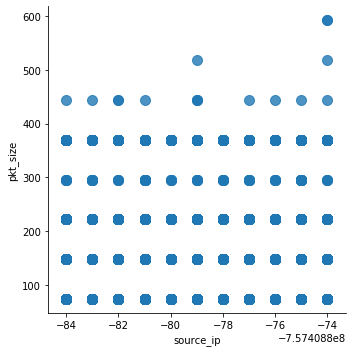

In [7]:
sns.lmplot('source_ip', 'pkt_size', data = records[records['pkt_size'] <= 1000], fit_reg = False, scatter_kws={"s":100})

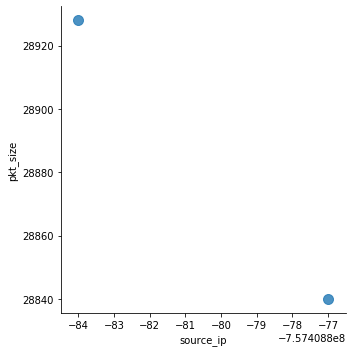

In [8]:
sns.lmplot('source_ip', 'pkt_size', data = records[records['pkt_size'] >= 1000], fit_reg = False, scatter_kws={"s":100})

In [9]:
pd.unique(records['STRTITLE'].values)

array(['tcp null scan', 'full xmas scan', 'xmas scan', 'tcp syn flooding'],
      dtype=object)

In [10]:
pd.unique(records['pkt_size'].values)

array([  148,    74,   370,   222,   296,   444,   518,   592, 28928,
       28840], dtype=int64)

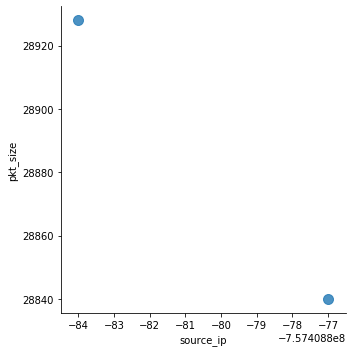

In [11]:
sns.lmplot('source_ip', 'pkt_size', data = records[records['STRTITLE']=='tcp syn flooding'], fit_reg = False, scatter_kws={"s":100})

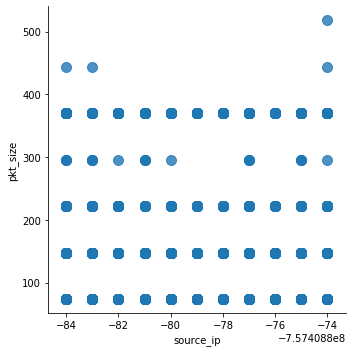

In [12]:
sns.lmplot('source_ip', 'pkt_size', data = records[records['STRTITLE']=='xmas scan'], fit_reg = False, scatter_kws={"s":100})

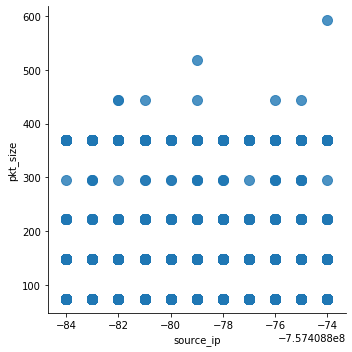

In [13]:
sns.lmplot('source_ip', 'pkt_size', data = records[records['STRTITLE']=='tcp null scan'], fit_reg = False, scatter_kws={"s":100})

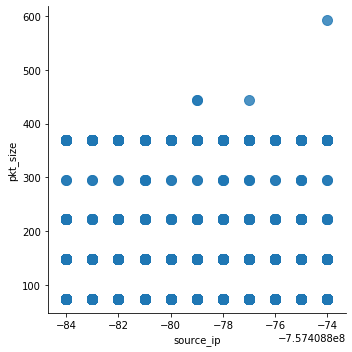

In [14]:
sns.lmplot('source_ip', 'pkt_size', data = records[records['STRTITLE']=='full xmas scan'], fit_reg = False, scatter_kws={"s":100})

<h1>시간순 비교</h1>

In [15]:
pd.unique(records['source_ip'].values)

array([-757408877, -757408882, -757408878, -757408884, -757408874,
       -757408883, -757408879, -757408881, -757408875, -757408880,
       -757408876], dtype=int64)

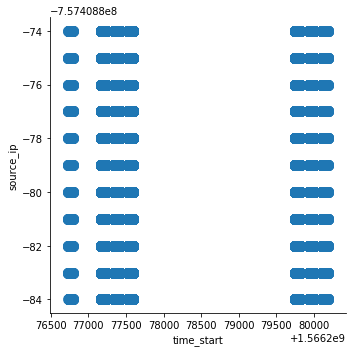

In [16]:
sns.lmplot('time_start','source_ip', data = records, fit_reg = False, scatter_kws={"s":100})

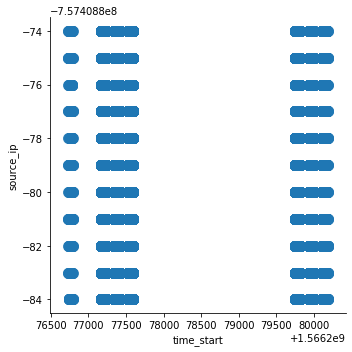

In [17]:
sns.lmplot('time_start','source_ip', data = records[records['STRTITLE']=='full xmas scan'], fit_reg = False, scatter_kws={"s":100})

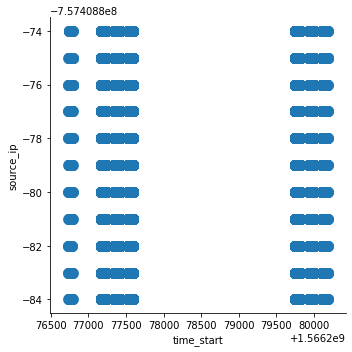

In [18]:
sns.lmplot('time_start','source_ip', data = records[records['STRTITLE']=='tcp null scan'], fit_reg = False, scatter_kws={"s":100})

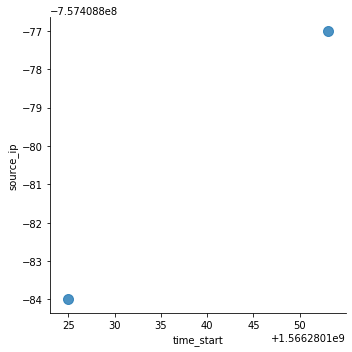

In [19]:
sns.lmplot('time_start','source_ip', data = records[records['STRTITLE']=='tcp syn flooding'], fit_reg = False, scatter_kws={"s":100})

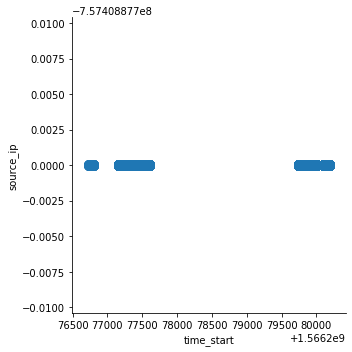

In [20]:
sns.lmplot('time_start','source_ip', data = records[records['source_ip']==-757408877], fit_reg = False, scatter_kws={"s":100})

In [21]:
points = records.values

In [22]:
points

array([[1566277194, -757408877, -872586238, ..., '00.15.C6.AE.50.C0',
        '00.1B.17.00.01.10', 148],
       [1566277194, -757408882, -872586238, ..., '00.15.C6.AE.50.C0',
        '00.1B.17.00.01.10', 148],
       [1566277194, -757408878, -872586238, ..., '00.15.C6.AE.50.C0',
        '00.1B.17.00.01.10', 148],
       ...,
       [1566279996, -757408877, -872586238, ..., '00.15.C6.AE.50.C0',
        '00.1B.17.00.01.10', 148],
       [1566279996, -757408880, -872586238, ..., '00.15.C6.AE.50.C0',
        '00.1B.17.00.01.10', 148],
       [1566279996, -757408875, -872586238, ..., '00.15.C6.AE.50.C0',
        '00.1B.17.00.01.10', 148]], dtype=object)

In [23]:
records['STRTITLE'].astype('category').cat.codes

0         1
1         1
2         0
3         1
4         0
         ..
177066    3
177067    0
177068    0
177069    3
177070    3
Length: 177071, dtype: int8

In [24]:
pd.get_dummies(records['STRTITLE'])

,full xmas scan,tcp null scan,tcp syn flooding,xmas scan
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
177066,0,0,0,1
177067,1,0,0,0
177068,1,0,0,0
177069,0,0,0,1


In [25]:
records.corr() #연관정도 1이 연관 높은것, 의미있는값은 안나옴

,time_start,source_ip,dest_ip,protocol_n,pkt_size
time_start,1.000000,0.002147,NaN,NaN,0.009390
source_ip,0.002147,1.000000,NaN,NaN,-0.001131
dest_ip,NaN,NaN,NaN,NaN,NaN
protocol_n,NaN,NaN,NaN,NaN,NaN
pkt_size,0.009390,-0.001131,NaN,NaN,1.000000


In [26]:
pd.unique(records['source_ip'].values)

array([-757408877, -757408882, -757408878, -757408884, -757408874,
       -757408883, -757408879, -757408881, -757408875, -757408880,
       -757408876], dtype=int64)

In [27]:
pd.unique(records['source_mac'].values)

array(['00.15.C6.AE.50.C0'], dtype=object)